# Исследование данных о российском кинопрокате

Заказчик этого исследования — Министерство культуры Российской Федерации.
Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.
Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

# Описание данных

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.


Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.


- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-данных-о-российском-кинопрокате" data-toc-modified-id="Исследование-данных-о-российском-кинопрокате-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование данных о российском кинопрокате</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-с-данными-и-объединим-их-в-один-датафрейм." data-toc-modified-id="Откроем-файлы-с-данными-и-объединим-их-в-один-датафрейм.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы с данными и объединим их в один датафрейм.</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек." data-toc-modified-id="Импорт-библиотек.-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Импорт библиотек.</a></span></li><li><span><a href="#Прочитаем-файлы-и-сохраним-их-в-перменные." data-toc-modified-id="Прочитаем-файлы-и-сохраним-их-в-перменные.-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Прочитаем файлы и сохраним их в перменные.</a></span></li><li><span><a href="#Общая-информация-по-фреймам." data-toc-modified-id="Общая-информация-по-фреймам.-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Общая информация по фреймам.</a></span></li><li><span><a href="#Наблюдения-по-методам-info()-и-describe()" data-toc-modified-id="Наблюдения-по-методам-info()-и-describe()-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Наблюдения по методам info() и describe()</a></span></li><li><span><a href="#Объединение-по-столбцу-puNumber." data-toc-modified-id="Объединение-по-столбцу-puNumber.-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Объединение по столбцу puNumber.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков." data-toc-modified-id="Стиль-заголовков.-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Стиль заголовков.</a></span></li><li><span><a href="#Шаг-2.1.-Проверьте-типы-данных" data-toc-modified-id="Шаг-2.1.-Проверьте-типы-данных-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Шаг 2.1. Проверьте типы данных</a></span><ul class="toc-item"><li><span><a href="#Наблюдения" data-toc-modified-id="Наблюдения-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Наблюдения</a></span></li><li><span><a href="#box_office" data-toc-modified-id="box_office-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>box_office</a></span></li><li><span><a href="#raitings" data-toc-modified-id="raitings-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>raitings</a></span></li><li><span><a href="#realease_date" data-toc-modified-id="realease_date-1.2.2.4"><span class="toc-item-num">1.2.2.4&nbsp;&nbsp;</span>realease_date</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.2.5"><span class="toc-item-num">1.2.2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Изучим-пропуски-в-датафрейме" data-toc-modified-id="Изучим-пропуски-в-датафрейме-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучим пропуски в датафрейме</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#'production_country'" data-toc-modified-id="'production_country'-1.3.0.1"><span class="toc-item-num">1.3.0.1&nbsp;&nbsp;</span>'production_country'</a></span></li><li><span><a href="#film_studio" data-toc-modified-id="film_studio-1.3.0.2"><span class="toc-item-num">1.3.0.2&nbsp;&nbsp;</span>film_studio</a></span></li><li><span><a href="#producer" data-toc-modified-id="producer-1.3.0.3"><span class="toc-item-num">1.3.0.3&nbsp;&nbsp;</span>producer</a></span></li><li><span><a href="#refundable_support,-nonrefundable_support,-budget,-financing_source" data-toc-modified-id="refundable_support,-nonrefundable_support,-budget,-financing_source-1.3.0.4"><span class="toc-item-num">1.3.0.4&nbsp;&nbsp;</span>refundable_support, nonrefundable_support, budget, financing_source</a></span></li><li><span><a href="#genres" data-toc-modified-id="genres-1.3.0.5"><span class="toc-item-num">1.3.0.5&nbsp;&nbsp;</span>genres</a></span></li><li><span><a href="#director" data-toc-modified-id="director-1.3.0.6"><span class="toc-item-num">1.3.0.6&nbsp;&nbsp;</span>director</a></span></li><li><span><a href="#ratings" data-toc-modified-id="ratings-1.3.0.7"><span class="toc-item-num">1.3.0.7&nbsp;&nbsp;</span>ratings</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.0.8"><span class="toc-item-num">1.3.0.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучим-дубликаты-в-датафрейме" data-toc-modified-id="Изучим-дубликаты-в-датафрейме-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Изучим дубликаты в датафрейме</a></span><ul class="toc-item"><li><span><a href="#Явные-дубликаты" data-toc-modified-id="Явные-дубликаты-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Явные дубликаты</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучим-категориальные-значения" data-toc-modified-id="Изучим-категориальные-значения-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Изучим категориальные значения</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверим-количественные-значения" data-toc-modified-id="Проверим-количественные-значения-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Проверим количественные значения</a></span><ul class="toc-item"><li><span><a href="#Обзор-столбцов" data-toc-modified-id="Обзор-столбцов-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>Обзор столбцов</a></span></li><li><span><a href="#Замена-на-суммарную-гос-поддержку." data-toc-modified-id="Замена-на-суммарную-гос-поддержку.-1.3.3.2"><span class="toc-item-num">1.3.3.2&nbsp;&nbsp;</span>Замена на суммарную гос поддержку.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.3.3"><span class="toc-item-num">1.3.3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Добавим-новые-столбцы." data-toc-modified-id="Добавим-новые-столбцы.-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Добавим новые столбцы.</a></span><ul class="toc-item"><li><span><a href="#Год-проката" data-toc-modified-id="Год-проката-1.3.4.1"><span class="toc-item-num">1.3.4.1&nbsp;&nbsp;</span>Год проката</a></span></li><li><span><a href="#Главный-режиссер,-основной-жанр" data-toc-modified-id="Главный-режиссер,-основной-жанр-1.3.4.2"><span class="toc-item-num">1.3.4.2&nbsp;&nbsp;</span>Главный режиссер, основной жанр</a></span></li><li><span><a href="#Доля-бюджета" data-toc-modified-id="Доля-бюджета-1.3.4.3"><span class="toc-item-num">1.3.4.3&nbsp;&nbsp;</span>Доля бюджета</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.4.4"><span class="toc-item-num">1.3.4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Проведем-исследовательский-анализ-данных" data-toc-modified-id="Проведем-исследовательский-анализ-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведем исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Столбчатый-график.-Количество-фильмов." data-toc-modified-id="Столбчатый-график.-Количество-фильмов.-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Столбчатый график. Количество фильмов.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4.0.2"><span class="toc-item-num">1.4.0.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбчатый-график.-Динамика-проката-по-годам." data-toc-modified-id="Столбчатый-график.-Динамика-проката-по-годам.-1.4.0.3"><span class="toc-item-num">1.4.0.3&nbsp;&nbsp;</span>Столбчатый график. Динамика проката по годам.</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.4.0.4"><span class="toc-item-num">1.4.0.4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Средняя-и-медианная-сумма-сборов-для-каждого-года." data-toc-modified-id="Средняя-и-медианная-сумма-сборов-для-каждого-года.-1.4.0.5"><span class="toc-item-num">1.4.0.5&nbsp;&nbsp;</span>Средняя и медианная сумма сборов для каждого года.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4.0.6"><span class="toc-item-num">1.4.0.6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Влияние-возратсных-ограничений-на-прокат." data-toc-modified-id="Влияние-возратсных-ограничений-на-прокат.-1.4.0.7"><span class="toc-item-num">1.4.0.7&nbsp;&nbsp;</span>Влияние возратсных ограничений на прокат.</a></span></li><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-1.4.0.8"><span class="toc-item-num">1.4.0.8&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></li></ul></li><li><span><a href="#Исследуем-фильмы,-которые-получили-государственную-поддержку" data-toc-modified-id="Исследуем-фильмы,-которые-получили-государственную-поддержку-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Исследуем фильмы, которые получили государственную поддержку</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#План-действий." data-toc-modified-id="План-действий.-1.5.0.1"><span class="toc-item-num">1.5.0.1&nbsp;&nbsp;</span>План действий.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5.0.2"><span class="toc-item-num">1.5.0.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

## Исследование данных о российском кинопрокате



### Откроем файлы с данными и объединим их в один датафрейм. 



#### Импорт библиотек.

Импортируем библиотеки для работы с данными, обозначим некоторые из них за переменные.

In [1]:
# Импортируем библиотеки и обозначим их за переменные.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# Отключаем предупреждения.
import warnings
warnings.filterwarnings('ignore')

#### Прочитаем файлы и сохраним их в перменные.

In [2]:
path_to_db = '/users/danielnodelman/yandex_ds/yandex_projects/movie_project/'


mkrf_movies = pd.read_csv(path_to_db+'mkrf_movies.csv')
mkrf_shows = pd.read_csv(path_to_db+'mkrf_shows.csv')

#### Общая информация по фреймам.

Выведем общую информацию по таблицам, используя методы info() и describe().

In [3]:
# Таблица mkrf_movies
mkrf_movies.info()
mkrf_movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
max,1.800000e+08,4.000000e+08,2.305074e+09


In [4]:
# Таблица mkrf_shows
mkrf_shows.info()
mkrf_shows.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
count,3.158000e+03,3.158000e+03
mean,1.201875e+08,7.647870e+07
std,1.238394e+07,2.403531e+08
min,1.110001e+08,0.000000e+00
25%,1.130002e+08,8.623900e+04
50%,1.210131e+08,2.327988e+06
75%,1.210283e+08,2.397967e+07
max,2.240264e+08,3.073569e+09


#### Наблюдения по методам info() и describe()

- 7485 значений в mkrf_movies, 3158 значений в mkrf_shows - количество не совпадает.
- В mkrf_movies много пропущенных значений.
- таблицы объединим по стобцу puNumber, который встречается в обеих таблицах()
- В таблицах столбец puNumber имеет разный тип данных.

#### Объединение по столбцу puNumber.

Объединение будем производить по столбцу puNumber, который присутсвует в обоих таблицах. Нужно изменить тип данных на int() в этом столбце, чтобы соединить между собой таблицы (тип данных должен быть одинаковым в обеих таблицах). Изучим данные внутри столбца при помощи метода sort_values()

In [5]:
mkrf_movies['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

Мы обнаружилили значение, которое является ошибкой. Это слово 'нет' в строке 1797. Это значение помешает нам привести данные к типу int()

Давайте посмотрим, что это за строка

In [6]:
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Нужно проконсультироваться с коллегами. Если они не смогут предоставить нам номер прокатного удостоверения, на этом этапе удалим эту строку, чтобы можно было изменить тип данных и продолжить исследование. 

**Еще один вариант - в условии метода pd.to_numeric() прописать errors='coerce'. Этот параметр заменит значение на NaN.**

In [7]:
# Удаление строки.
mkrf_movies = mkrf_movies.drop(mkrf_movies.index[1797])

Строка удалена, *либо* заменена на NaN. Теперь можно изменить тип данных на int и объединить таблицы. Новый датафрей обозначим за переменную df.

In [8]:
# Строка 1797 имеет NaN значение в новом датафрейме.
#mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'],errors='coerce')
# Строка 1797 удалена
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'])
# Объединяем таблицы методом merge()
df = mkrf_movies.merge(mkrf_shows, on = 'puNumber', how = 'outer')

In [9]:
# Выводим информацию о новом датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Вывод
- Поменяли тип данных в столбце puNumber на int.
- Строка 1797 *либо* удалена, *либо* имеет значение NaN
- Мы объедини две таблицы по столбцу puNumber в одну, обозначили ее под переменной df. 
- В таблице 7485 строк, 16 столбцов. 
- В таблице есть множество пропущенных значений.  

### Шаг 2. Предобработка данных

#### Стиль заголовков.

Посмотрим на названия заголовков, приведем их к единому стилю написания.

In [10]:
# Выводим заголовки
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Имя столбца 'puNumber' приведем к 'змеиному регистру'. Так же поменяем названия столбцов для удобства их воспрития:

- 'title' заменим на 'movie_title'.
- 'show_start_date' заменим на 'release_date'.
- 'type'заменим на 'movie_type'.

In [11]:
# Применим метод rename к названиям столбцов.
df = df.rename(columns={
    'title': 'movie_title',
    'puNumber': 'pu_number',
    'show_start_date': 'release_date',
    'type': 'movie_type',
})

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Выведем общую информацию по df().

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_title            7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   release_date           7485 non-null   object 
 3   movie_type             7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

##### Наблюдения
- Столбец box_office заменим тип данных на int. В столбце присутсвуют пропуски, поэтому заменим их на 0, чтобы они не мешали преобразованию.
- Столбец ratings заменим тип данных float. В столбце присутсвуют пропуски, поэтому заменим их на 0, чтобы они не мешали преобразованию.
- Столбец release_date заменим тип данных на datetime. 

##### box_office

Заменим тип данных на int. Заменим пропуски на 0.

In [13]:
df['box_office'] = df['box_office'].fillna(0).astype('int')

##### raitings

Посмотрим на уникальные значения.

In [14]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Помимо десятичных значений мы видим проценты. Напишем цикл, который приведет % к десятичным дробям.

In [15]:
for value in df[~ df['ratings'].isna()]['ratings']:
    try:
        if value[-1] == '%':
            df.loc[df['ratings'] == value, 'ratings'] = int(value[:2])/10
    except:
         break

Посмотрим на данные после применения 

In [16]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', 9.9, '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', 2.8, '3.7', '1.4', '3.1', 9.7, '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', 8.3,
       6.4, 9.1, 9.4, 6.2, 7.9, 9.0, 1.9, 8.8, '1.0', 8.9, '1.3', '1.9',
       '1.8', '1.2', '1.7', '9.0', 9.8, '8.9', '9.1'], dtype=object)

Мы заменили проценты на дробные значения. Теперь изменим тип данных на float.

In [17]:
df['ratings'] = df['ratings'].astype('float')

##### realease_date

Оставим внутри столбца только дату, так как время в каждой строке одинаковое.

In [18]:
df['release_date'] = pd.to_datetime(df[
    'release_date']).apply(lambda x: x.strftime('%Y-%m-%d'))
df['release_date'] = pd.to_datetime(df['release_date'])

##### Вывод

- Столбец box_office заменили тип данных на int. 
- Столбец ratings заменили тип данных float, преобразовали значения из процентов в десятичные дроби. 
- Столбец release_date заменили тип данных на datetime, удалили информацию о времени.

### Изучим пропуски в датафрейме



Посчитаем процентное соотношение пропусков в столбцах и выведем их на экран в виде таблицы.

In [19]:
# Общее количество пропусков.
df.isna().sum()

movie_title                 0
pu_number                   0
release_date                0
movie_type                  0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office                  0
dtype: int64

In [20]:
# Таблица процентного соотношения пропусков.
pd.DataFrame(round(
    df.isna().mean()*100, 2)).style.background_gradient('Blues')

,0
movie_title,0.000000
pu_number,0.000000
release_date,0.000000
movie_type,0.000000
film_studio,0.240000
production_country,0.030000
director,0.120000
producer,7.590000
age_restriction,0.000000
refundable_support,95.560000


##### 'production_country'

Всего два пропуска, по информации из интернета можно заменить на Россия.

In [21]:
# Заменим пропуски в стоолбце
df.loc[df['production_country'].isna(),  'production_country'] = 'Россия'

##### film_studio

Чтобы ответить на вопросы исследования не придется искать пропущенные результаты, поэтому ничего не меняем в этом столбце.

##### producer

Чтобы ответить на вопросы исследования не придется искать пропущенные результаты, поэтому ничего не меняем в этом столбце. Узнать пропуски сложно, удалить некорректно, поэтому заменим на 'Неизвестен'

In [22]:
df.loc[df['producer'].isna(), 'producer'] = 'Неизвестен'

##### refundable_support, nonrefundable_support, budget, financing_source 

Столбцы содержат  много пропусков. Они относятся только к фильмам, которые получили государственную поддержку, следовательно пропуски - отствуие поддержки.

##### genres

In [23]:
# по аналогии с producer 
df.loc[df['genres'].isna(), 'genres'] = 'Неизвестен'

##### director

In [24]:
# по аналогии с producer, genres
df.loc[df['director'].isna(), 'director'] = 'Неизвестен'

##### ratings

Заполнять средним некорректно.

##### Вывод

Мы заполнили пропуски в данных, посмотрим на таблицу после заполнения.

In [25]:
# Общее количество пропусков.
df.isna().sum()

movie_title                 0
pu_number                   0
release_date                0
movie_type                  0
film_studio                18
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                      0
box_office                  0
dtype: int64

####  Изучим дубликаты в датафрейме


##### Явные дубликаты

Посмотрим на наличие дубликатов между столбцами title, director.

In [26]:
df[ (df['movie_title'].str.lower().duplicated()) & (df['director'].str.lower().duplicated()) ]['movie_title'].count()

694

Обнаружено 694 дубликата, давайте избавимся от них

In [27]:
df = df.drop(  df[( (df['movie_title'].str.lower().duplicated())  \
     & (df['director'].str.lower().duplicated())  )].index, inplace = False).reset_index(drop = True)

Для удобноства работы с данными, приведем все категориальные значения к нижнему регистру, затем проверим датафрейм на наличие дубликатов. Для этого создадим цикл, который пройдет по списку столбцов.

In [28]:
columns_list = ['movie_title', 'movie_type', 'film_studio',
                       'production_country', 'director', 'producer',
                       'age_restriction', 'genres']
# Цикл
for value in columns_list:
    df[value] = df[value].str.lower()
# Посмотрим сколько осталось дубликатов.
df.duplicated().sum()

0

##### Вывод

Мы избавились от явных дубликатов, привели данные к нижнему регистру, для удобства их восприятия.
Дубликаты могли возникнуть из за сбора данных об одинаковых фильмах из разных кинотеатров.

#### Изучим категориальные значения


Мы уже создавали список с категориальными столбцами. Давайте добавим в него столбец financing_source и посмотрим на уникальные значения в этих столбцах. Пройдем циклом по ним. Цикл закомментирован, так как вывод очень длинный.

In [29]:
new_columns_list = ['movie_title', 'movie_type', 'film_studio',
                       'production_country', 'director', 'producer',
                       'age_restriction', 'genres', 'financing_source']
# Цикл
#for column in new_columns_list:
    #print(column)
    #print(df[column].sort_values().unique())

Мы можем заметить интересную тенденцию. В столбцах присуствует разная или неправильная запись одних и тех же данных,они производят много дублирующихся по смылу ненужных категорий. Пройдем новым циклом по данных, в нем убрем лишние пробелы из них.

In [30]:
for column in new_columns_list:
    df[column] = df[column].str.strip()

##### Вывод 

Мы преобразовали категориальные данные внутри таблицы.

#### Проверим количественные значения



##### Обзор столбцов

Давайте посмотрим на данные внутри столбцов с количественными значениями при помощи метода describe(). Окргули значения до двух знаков после запятой, выведем количественные столбцы.

In [31]:
pd.options.display.float_format = '{:.2f}'.format
df[['budget', 'refundable_support', 'nonrefundable_support',
    'box_office']].describe()

,budget,refundable_support,nonrefundable_support,box_office
count,330.00,330.00,330.00,6791.00
mean,127628078.60,11921212.12,49126328.22,33585477.93
std,189087896.27,24980682.22,60131650.61,162814007.52
min,0.00,0.00,0.00,0.00
25%,42000000.00,0.00,25000000.00,0.00
50%,68649916.00,0.00,30000000.00,0.00
75%,145905958.50,15000000.00,41125000.00,1473515.00
max,2305074303.00,180000000.00,400000000.00,3073568690.00


budget содержит в себе сумму столбцов refundable_support и nonrefundable_support по документации. В таблице присуствуют нулевые значения. Они являются аномалиями. Давайте посмотрим на значения таблицы применив к ней условие budget < (refundable_support + nonrefundable_support).

In [32]:
display(df.query('budget < (refundable_support + nonrefundable_support)'))

,movie_title,pu_number,release_date,movie_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1871,14+,111023614,2014-12-19,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016
1876,дуxless 2,111000415,2015-01-26,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511
2253,воин (2015),111017315,2015-09-28,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438
2311,бармен.,111009615,2015-05-26,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974
2385,савва. сердце воина,114001715,2015-07-21,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551
2447,тряпичный союз,111010215,2015-06-08,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738
2543,срочно выйду замуж,111017115,2015-09-30,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783
2623,помню - не помню!,111004916,2016-03-01,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931
2788,любовь с ограничениями,111008216,2016-04-29,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052
3278,притяжение (2016),111018116,2016-12-16,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489


 Всего 16 строк.

##### Замена на суммарную гос поддержку.

Заменим аномальные значения в строках на сумму гос поддержки.

In [33]:
df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support']),
       'budget'] = df['refundable_support'] + df['nonrefundable_support']

##### Вывод

Мы заменили аномальные значения.

#### Добавим новые столбцы.





##### Год проката

Выделим год проката из столбца realese_date, затем сохраним выделенное в новый столбец.

In [34]:
df['release_year'] = df['release_date'].dt.year

##### Главный режиссер, основной жанр

Создадим функцию, которая будет выделять одно значение до первой запятой в ячейке столбца. Таким обращом, мы сможем выделить главные по-смыслу значения. Применим функцию к столбцам, результаты запишем в новые столбцы

In [35]:
def before_comma(value):
    result = value.split(',')
    return result[0]
#  cnj
df['main_director'] = df['director'].apply(before_comma)
# получим название жанра
df['main_genre'] = df['genres'].apply(before_comma)

##### Доля бюджета

Посчитаем долю и добавим её в новый столбец. Назовем его support_ratio.

In [36]:
df['support_ratio'] = (df['refundable_support'] +
                       df['nonrefundable_support']) / df['budget']


##### Вывод

Мы создали новые столбцы.

### Проведем исследовательский анализ данных


##### Столбчатый график. Количество фильмов.

Построим столбчатый график. Изобразим на нем количество релизов по годам. После графика выведем на экран долю фильмов с указанной информацией о прокате в кинотеатрах.

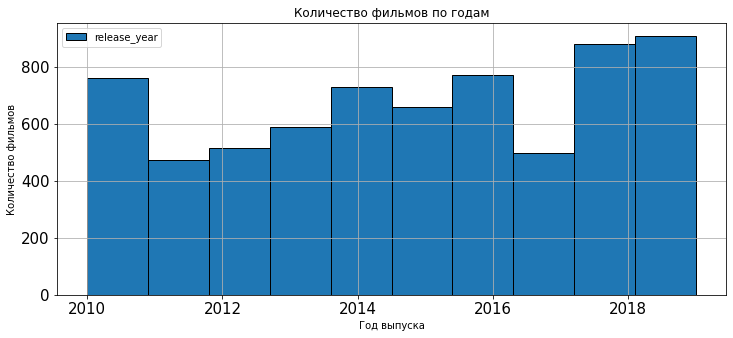

2019    909
2018    879
2016    771
2010    761
2014    729
2015    661
2013    590
2012    517
2017    499
2011    475
Name: release_year, dtype: int64

In [37]:

df.plot.hist(
             y='release_year',
             grid=True, 
             title='Количество фильмов по годам',
             bins=10,
             range=(2010, df['release_year'].max()),
             figsize=(12, 5)
             ,fontsize = 15
             , ec = 'black'
)
plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.show()
df['release_year'].value_counts()


Посчитаем долю.

In [38]:
print("Доля фильмов с указанной информацией о прокате:\n{:.2%}"
      .format(df[df['box_office'] > 1]['box_office'].count() /
              df['box_office'].count()))

Доля фильмов с указанной информацией о прокате:
44.15%


##### Вывод
- Доля меньше половины.
- Лидером по количеству фильмов является 2019 год.

##### Столбчатый график. Динамика проката по годам.

Создадим pivot_table по столбцу box_office. Функцией будет sum. Затем построим столбчатую диаграмму.

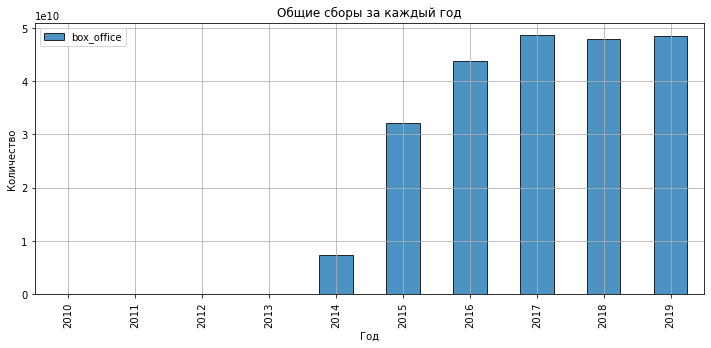

In [39]:
box_office_year = df.pivot_table(
    index='release_year',
    values='box_office',
    aggfunc='sum'
    )
box_office_year.plot(
              kind='bar',
              grid=True,
              figsize=(12, 5),
              alpha=0.8,
              ec = 'Black',
              title =('Общие сборы за каждый год'))
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

#####  Выводы

- Лидерами по сборам являются 2017 и 2019 годы. Динамика роста наблюдается с 2014 до 2017. До 2014 данных недостаточно.

##### Средняя и медианная сумма сборов для каждого года.

Построим сводную таблицу, все данные в ней должны быть больше 0.

In [40]:
box_office_no_null = df.query('box_office > 0')
box_office_year_no_null = box_office_no_null.pivot_table(
    index='release_year',
    values='box_office',
    aggfunc=['sum', 'mean', 'median']
    )

Выводим таблицу.

In [41]:
box_office_year_no_null

,sum,mean,median
,box_office,box_office,box_office
release_year,,,
2010,2374340,28265.95,2085.00
2011,13944390,142289.69,3042.50
2012,6465111,58244.24,6900.00
2013,29768529,174084.96,3880.00
2014,7372598552,29372902.60,28150.00
2015,32084649739,74964134.90,4398303.50
2016,43731444552,87462889.10,3650260.50
2017,48561554263,136408860.29,10177833.50


Методом describe() узнаем о максимальных и минимальных значениях.

In [42]:
box_office_year_no_null.describe()

,sum,mean,median
,box_office,box_office,box_office
count,10.00,10.00,10.00
mean,22807898060.10,52188077.65,3182456.35
std,23063081422.54,51881692.37,3875776.45
min,2374340.00,28265.95,2085.00
25%,17900424.75,150238.51,4635.00
50%,19728624145.50,52168518.75,1839205.25
75%,46826125165.50,90772499.92,4649033.38
max,48561554263.00,136408860.29,10177833.50


##### Вывод
- наибольшее среднее значение суммы сборов - 2017 год, наименьшее - 2010 год.
- наибольшее медианное значение суммы сборов - 2017 год, наименьшее - 2010 год.

##### Влияние возратсных ограничений на прокат.

Отфильтруем таблицу. Условия: данные с 2014 года, без нулевых значений. Условия обусловденны прошлыми результатами. Выведем результат фильтрации на экран.

In [43]:
box_office_age = df.query('(box_office > 0)'                                    '& (release_year > 2014)')

Выведем результат фильтрации на экран.

In [44]:
box_office_year_age = box_office_age.pivot_table(
    index=['release_year', 'age_restriction'],
    values='box_office',
    aggfunc=['sum']
    )
box_office_year_age

sum
                                                      box_office
release_year age_restriction                                    
2015         «0+» - для любой зрительской аудитории    273367758
             «12+» - для детей старше 12 лет         11957220564
             «16+» - для детей старше 16 лет          8274253145
             «18+» - запрещено для детей              3184097912
             «6+» - для детей старше 6 лет            8395710360
2016         «0+» - для любой зрительской аудитории    150183539
             «12+» - для детей старше 12 лет         12178337032
             «16+» - для детей старше 16 лет         14359349571
             «18+» - запрещено для детей              4990430019
             «6+» - для детей старше 6 лет           12053144391
2017         «0+» - для любой зрительской аудитории    229598930
             «12+» - для детей старше 12 лет          7851427659
             «16+» - для детей старше 16 лет         18742889948
             «18+» - запрещено для детей              9651495581
             «6+» - для детей старше 6 лет           12086142145
2018         «0+» - для любой зрительской аудитории     32449001
             «12+» - для детей старше 12 лет         14267291636
             «16+» - для детей старше 16 лет         14817362944
             «18+» - запрещено для детей              8635607197
             «6+» - для детей старше 6 лет           10104974592
2019         «0+» - для любой зрительской аудитории     17746066
             «12+» - для детей старше 12 лет         12677017525
             «16+» - для детей старше 16 лет         12749387308
             «18+» - запрещено для детей             10121796238
             «6+» - для детей старше 6 лет           12852548618

In [45]:
box_office_year_age.describe()

,sum
,box_office
count,25.00
mean,8826153187.16
std,5447593941.08
min,17746066.00
25%,4990430019.00
50%,10104974592.00
75%,12677017525.00
max,18742889948.00


##### Вывод.

- Максимальное значение - 18742889948 «16+» 2017 год, минимальное - 17746066 «0+» 2019 год.
- Наблюдается тенденция роста.
- «16+» самые ликвидные фильмы. Подростки ходят в кино чаще чем дети, помимо них эта категория включает и взрослых людей.


### Исследуем фильмы, которые получили государственную поддержку



##### План действий.

- Отфильтруем данные по столбцу budget. Значения должны быть больше 0
- Применим к фильтру метод describe()
- Посчитаем соотношение государственного финансирования к размеру кассовых сборов, изучим квартили по методу describe()
- Построим гистограмму по рейтингу кинопоиска и узнаем, какую оценку имеют фильмы с гос поддержкой.

In [46]:
df_budget = df.loc[df.loc[:, 'budget'] > 0]
df_budget['budget'].describe()

count          330.00
mean     131846167.89
std      187633606.15
min        6000000.00
25%       45497088.50
50%       71196901.50
75%      150000000.00
max     2305074303.00
Name: budget, dtype: float64

Макисмально выделялось 2305074303 рублей. Интересно, что за фильм с такой гос поддержкой.

In [47]:
df_budget.query('budget == 2305074303.00')

,movie_title,pu_number,release_date,movie_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,support_ratio
6430,тайна печати дракона,111012819,2019-09-12,художественный,"ооо ""кинокомпания ""ств""; ооо ""рфг корп""; ооо ""...",россия-китай,о.степченко,"с.сельянов, а.петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059,2019,о.степченко,приключения,0.12


Страна проивзодитель Россия - Китай. Вопросы о величине бюджета отпадают.

Минимально 6000000. Интересно, что за фильм с такой гос поддержкой.

In [48]:
df_budget.query('budget == 6000000')

,movie_title,pu_number,release_date,movie_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,support_ratio
2623,помню - не помню!,111004916,2016-03-01,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,6000000.00,Министерство культуры,4.30,комедия,15362931,2016,в.ровенский,комедия,1.00


Описание с сайта Кинопоиск: 'Библиотекарша меняется телами с заносчивой блондинкой. Комедия об умении любить себя со звездой Comedy Woman.'

Рейтинг всего на 1,3 ниже по сравнению с фильмом с максимальным бюджетом.


 Среднее значение 131846167. Теперь посчитаем соотношение государственного финансирования к размеру кассовых сборов, изучим квартили по методу describe()

In [49]:
df_budget_box_office = df_budget[df_budget[
    'box_office'] > 0]
df_budget_box_office['budget_ratio'] = df_budget_box_office[
    'budget'] / df_budget_box_office['box_office']
df_budget_box_office['budget_ratio'].describe()

count     316.00
mean      373.56
std      3429.99
min         0.05
25%         1.02
50%         5.60
75%        43.34
max     58709.68
Name: budget_ratio, dtype: float64

1.02 - значение первого квартиля. Это означает, что большинство фильмов не окупаются. Отфильтруем рейтинги по принципу 'все кроме нулевых' и построим гистограмму зависимости оценки.

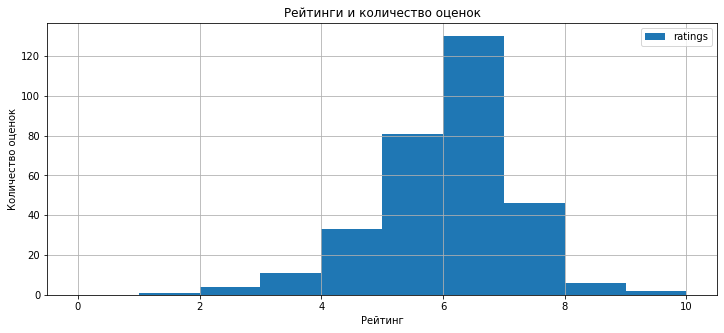

In [50]:
df_budget_ratings = df_budget.loc[
    df_budget.loc[:, 'ratings'] > 0]
df_budget_ratings.plot.hist(
                                     y='ratings',
                                     grid=True,
                                     title='Рейтинги и количество оценок',
                                     bins=10,
                                     range=(0, 10),
                                     figsize=(12, 5)
)
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.show()

##### Вывод

- Менее четверти фильмов с гос поддержкой хорошо оценены зрителями, учитывая что рейтинг оценки 'хорошая' на Кинопоиске начинается с 7.

### Общий вывод

**Результаты исследования**

Мы преобразовали данные, создали новые столбцы. Для данных верны утверждения:

- Доля фильмов с указанной информацией о прокате: 44.15% это меньше, чем половина.
- Лидером по количеству фильмов является 2019 год.
- Лидерами по сборам являются 2017 и 2019 годы. Динамика роста наблюдается с 2014 до 2017. До 2014 данных недостаточно.
- Наибольшее среднее значение суммы сборов - 2017 год, наименьшее - 2010 год.
- Наибольшее медианное значение суммы сборов - 2017 год, наименьшее - 2010 год.
- «16+» самые ликвидные фильмы. Подростки ходят в кино чаще чем дети, помимо них эта категория включает и взрослых людей.
- Менее четверти фильмов с гос поддержкой хорошо оценены зрителями, учитывая что рейтинг оценки 'хорошая' на Кинопоиске начинается с 7.